In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dataset_filename = 'top_1000_pe_imports.csv'
knn_model_filename = 'knnjoblib_file.sav'
rf_model_filename = 'rfjoblib_file.sav'
save_model = False

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Dataset
downloaded = drive.CreateFile({'id':"1uoSqL1UqTDnwvMEqdMTX5i-DY9cSwLdu"})
downloaded.GetContentFile(dataset_filename)

# if save_model == False:
#   # KNN Model
#   downloaded = drive.CreateFile({'id':"1-EWG_Ew9jEJG8EjNIeEddtnfJrLh-8RP"})
#   downloaded.GetContentFile(knn_model_filename)
#   # RF Model
#   downloaded = drive.CreateFile({'id':"1eungIjhBFbzgXL97TurzKxhWIIv99MMv"})
#   downloaded.GetContentFile(rf_model_filename)

In [ ]:
def get_data():
  data = pd.read_csv(dataset_filename)
  data_sorted = data.sort_values('malware')
  data_sorted = data_sorted.head(5000)
  x_2 = data_sorted.drop(["malware","hash"], axis = 1)
  y = data_sorted['malware']
  y = pd.DataFrame(data=y,columns=['malware'])
  y = y.reset_index(drop=True)

  x_2 = StandardScaler().fit_transform(x_2)
  col = []
  a = 100
  col = col_pca(a)
  pca = PCA(n_components=a)
  principalComponents = pca.fit_transform(x_2)
  x = pd.DataFrame(data = principalComponents, columns = col)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
  return (x, y)

def col_pca(a):
  columns = []
  for i in range (0,a):
    name = "PC{}".format(i+1)
    columns.append(name)
  return columns

def get_train_test_split(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
  return (x_train, x_test, y_train, y_test)

def plot_confusion_matrix(y_test, y_pred):
  cf_matrix1= confusion_matrix(y_test, y_pred)
  group_names = ["TrueNeg","FalsePos","FalseNeg","TruePos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix1.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix1.flatten()/np.sum(cf_matrix1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix1, annot=labels, fmt="", cmap='Blues')

def get_predictions_and_probabilities_KNN_and_RF(x):
  knn_model = joblib.load(knn_model_filename)
  rf_model = joblib.load(rf_model_filename)
  y_pred_knn_proba = np.array(knn_model.predict_proba(x))
  y_pred_rf_proba = np.array(rf_model.predict_proba(x))
  y_pred_knn_proba = y_pred_knn_proba.T
  y_pred_rf_proba = y_pred_rf_proba.T
  data_dict = dict()
  data_dict["KNN Pred Prob 0"] = y_pred_knn_proba[0]
  data_dict["KNN Pred Prob 1"] = y_pred_knn_proba[1]
  data_dict["RF Pred Prob 0"] = y_pred_rf_proba[0]
  data_dict["RF Pred Prob 1"] = y_pred_rf_proba[1]
  df = pd.DataFrame(data_dict)
  print(df.head())
  return df

In [ ]:
x, y = get_data()
x_train, x_test, y_train, y_test = get_train_test_split(x, y)

In [ ]:
print(x.head())

         PC1       PC2       PC3  ...      PC98      PC99     PC100
0  -8.746270  2.312617  6.004462  ...  0.624831  0.320791  1.191104
1 -10.836956  3.748380  6.403976  ... -0.166361 -0.210040  1.704502
2 -11.182989  3.813067  6.719901  ...  0.120826 -0.190705  0.723347
3  -9.170643  1.996833  4.300885  ... -0.864860  0.276208 -0.518987
4  -9.305109 -0.282422  1.826068  ... -0.202072  0.346191  0.094050

[5 rows x 100 columns]


Feature: 0, Score: 0.01598
Feature: 1, Score: 0.01983
Feature: 2, Score: 0.04368
Feature: 3, Score: 0.03386
Feature: 4, Score: 0.01242
Feature: 5, Score: 0.02407
Feature: 6, Score: 0.04279
Feature: 7, Score: 0.11472
Feature: 8, Score: 0.02043
Feature: 9, Score: 0.01269
Feature: 10, Score: 0.00905
Feature: 11, Score: 0.05099
Feature: 12, Score: 0.00846
Feature: 13, Score: 0.03398
Feature: 14, Score: 0.00881
Feature: 15, Score: 0.00579
Feature: 16, Score: 0.00861
Feature: 17, Score: 0.01190
Feature: 18, Score: 0.00629
Feature: 19, Score: 0.00614
Feature: 20, Score: 0.00657
Feature: 21, Score: 0.00911
Feature: 22, Score: 0.00471
Feature: 23, Score: 0.00886
Feature: 24, Score: 0.00591
Feature: 25, Score: 0.00634
Feature: 26, Score: 0.00589
Feature: 27, Score: 0.00602
Feature: 28, Score: 0.01022
Feature: 29, Score: 0.00714
Feature: 30, Score: 0.00607
Feature: 31, Score: 0.00677
Feature: 32, Score: 0.00672
Feature: 33, Score: 0.00333
Feature: 34, Score: 0.00595
Feature: 35, Score: 0.00541
Fe

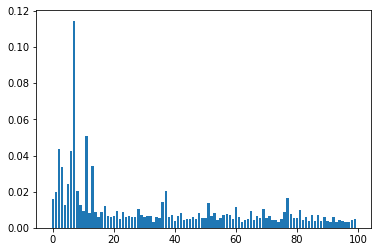

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

importance = clf2.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
importance = importance.T
arr=[]
arr = [i for i in range(100)] 
arr = np.array(arr)
arr = arr.T
data_dict = dict()
data_dict["Feature"] = arr
data_dict["Score"] = importance
df = pd.DataFrame(data_dict)

df

,Feature,Score
0,0,0.015976
1,1,0.019830
2,2,0.043678
3,3,0.033864
4,4,0.012424
...,...,...
95,95,0.003923
96,96,0.003086
97,97,0.003408
98,98,0.004181


In [ ]:
df.sort_values(by=['Score'],ascending=False,inplace=True)
df = df.reset_index(drop=True)
df

,Feature,Score
0,7,0.114721
1,11,0.050992
2,2,0.043678
3,6,0.042787
4,13,0.033976
...,...,...
95,33,0.003327
96,91,0.003278
97,62,0.003227
98,74,0.003188


In [ ]:
s = df['Feature']
new_x = pd.DataFrame(columns = x.columns)
new_y = pd.DataFrame(columns = y.columns)
# print(new_x)
for j in range(4,5000,5):
  new_x = new_x.append(x.iloc[j], ignore_index = True)
  new_y = new_y.append(y.iloc[j],ignore_index = True)
for i in range(10):
  a = s[i]

  for j in range(len(new_x)):

    new_x.iloc[j,a] = 0 - new_x.iloc[j,a]

print(new_x.head())
print(new_y.head())


         PC1       PC2       PC3  ...      PC98      PC99     PC100
0  -9.305109  0.282422 -1.826068  ... -0.202072  0.346191  0.094050
1 -10.236613 -3.747118 -5.359542  ... -1.167930  1.010020  0.525235
2  -9.758729 -2.023547 -6.413423  ... -0.032967 -1.085357  1.462529
3  -8.422165 -1.043668 -4.156373  ...  0.940311  0.345689  0.250597
4 -10.847515 -4.110501 -6.517017  ... -0.167398  0.189413  0.009320

[5 rows x 100 columns]
  malware
0       0
1       0
2       0
3       0
4       0


RF Accuracy:  57.754197022489706


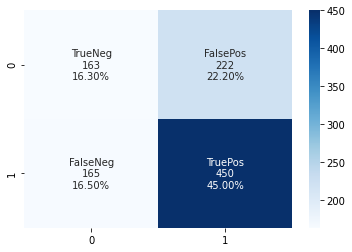

In [ ]:
y_pred2 = clf2.predict(new_x)
new_y = new_y.astype(int)

acc_rmf_model = roc_auc_score(new_y, y_pred2)*100
print("RF Accuracy: ", acc_rmf_model)
plot_confusion_matrix(new_y, y_pred2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
new_x_wadv = pd.DataFrame(data = x, columns = x.columns)
new_y_wadv = pd.DataFrame(data = y, columns = y.columns)
for i in range(1000):
  new_x_wadv = new_x_wadv.append(new_x.iloc[i], ignore_index = True)
  new_y_wadv = new_y_wadv.append(new_y.iloc[i],ignore_index = True)

print(new_x_wadv.shape, new_y_wadv.shape)


(6000, 100) (6000, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF Model Saved to  rfjoblib_file.sav
RF Accuracy:  88.81481481481481


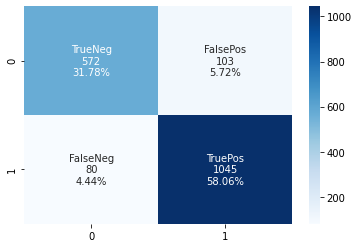

In [ ]:
new_x_wadv_train, new_x_wadv_test, new_y_wadv_train, new_y_wadv_test = train_test_split(new_x_wadv, new_y_wadv, test_size=0.3, random_state=1)
clf_new= RandomForestClassifier(max_depth=45, random_state=4).fit(new_x_wadv_train, new_y_wadv_train)
y_pred2 = clf2.predict(new_x_wadv_test)
acc_rmf_model = roc_auc_score(new_y_wadv_test, y_pred2)*100
save_model = True

if save_model:
  joblib.dump(clf2, rf_model_filename)
  print("RF Model Saved to ", rf_model_filename)

print("RF Accuracy: ", acc_rmf_model)
plot_confusion_matrix(new_y_wadv_test, y_pred2)

KNN Accuracy:  46.099672685038534


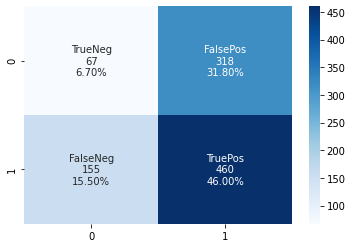

In [ ]:
y_pred = clf.predict(new_x)
acc_knb_model=roc_auc_score(new_y, y_pred)*100

print("KNN Accuracy: ", acc_knb_model)
plot_confusion_matrix(new_y, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN Model Saved to  knnjoblib_file.sav
KNN Accuracy:  89.61481481481482


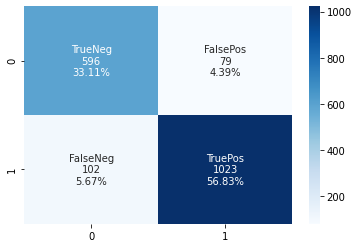

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
clf = knn.fit(new_x_wadv_train, new_y_wadv_train)
y_pred = clf.predict(new_x_wadv_test)
acc_knb_model=roc_auc_score(new_y_wadv_test, y_pred)*100
save_model = True

if save_model:
  joblib.dump(knn, knn_model_filename)
  print("KNN Model Saved to ", knn_model_filename)

print("KNN Accuracy: ", acc_knb_model)
plot_confusion_matrix(new_y_wadv_test, y_pred)

###LineBreak

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN Model Saved to  knnjoblib_file.sav
KNN Accuracy:  90.89541912999725


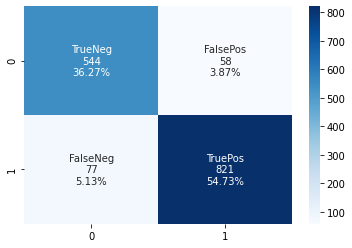

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
clf = knn.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_knb_model=roc_auc_score(y_test, y_pred)*100
save_model = True

if save_model:
  joblib.dump(knn, knn_model_filename)
  print("KNN Model Saved to ", knn_model_filename)

print("KNN Accuracy: ", acc_knb_model)
plot_confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RF Model Saved to  rfjoblib_file.sav
RF Accuracy:  93.0330598080637


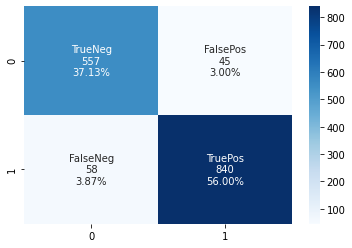

In [ ]:
clf2 = RandomForestClassifier(max_depth=45, random_state=4).fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
acc_rmf_model = roc_auc_score(y_test, y_pred2)*100
save_model = True

if save_model:
  joblib.dump(clf2, rf_model_filename)
  print("RF Model Saved to ", rf_model_filename)

print("RF Accuracy: ", acc_rmf_model)
plot_confusion_matrix(y_test, y_pred2)

# **Hybrid Classifier**

In [ ]:
pip install keras-adabound

In [ ]:
from keras_adabound import AdaBound

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.activations import sigmoid
from keras.optimizers import SGD
from keras.losses import binary_crossentropy
from keras.utils import to_categorical

In [ ]:
def get_hybrid_dataset():
  x, y = get_data()
  df = get_predictions_and_probabilities_KNN_and_RF(x)
  for col in df.columns:
    x[col] = list(df[col])
  return x, y

In [ ]:
x, y = get_hybrid_dataset()
x_train, x_test, y_train, y_test = get_train_test_split(x, y)

   KNN Pred Prob 0  KNN Pred Prob 1  RF Pred Prob 0  RF Pred Prob 1
0         1.000000         0.000000        0.874133        0.125867
1         1.000000         0.000000        0.834000        0.166000
2         1.000000         0.000000        0.975000        0.025000
3         0.916667         0.083333        0.910000        0.090000
4         0.083333         0.916667        0.633846        0.366154


In [ ]:
model = Sequential()
layers = [Dense(104), Dense(416), Dense(208), Dense(52), Dense(13), Dense(4), Dense(1), Activation(sigmoid)]
for layer in layers:
  model.add(layer)

In [ ]:
model.compile(optimizer = SGD(learning_rate=0.002, momentum=0.99), loss = binary_crossentropy, metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=250)

Epoch 1/200
14/14 [==============================] - 1s 3ms/step - loss: 0.9979 - accuracy: 0.5933
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.8170
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8451
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8855
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8937
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.8964
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.9138
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.8954
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9222
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9157
Epoch 11/

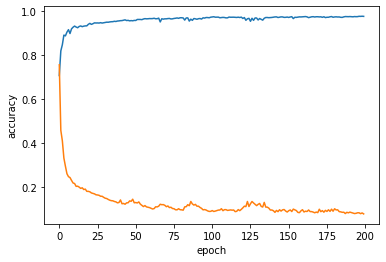

[[614 237]
 [ 61 888]]
84.94814814814815


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# "Loss"

y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
print(confusion_matrix(y_pred,y_test))
print(roc_auc_score(y_test, y_pred)*100)

In [ ]:
print(x.shape)